### **Importing all libraries required in this notebook**



In [1]:
# Importing all libraries required in this notebook

import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

### **Reading data from remote link**



In [2]:
# Reading data from remote link

#storing a remote link url as a string in url
url = "http://bit.ly/w-data"

#Storing the data read from the url in s_data.
#This is our dataset for the project.
s_data = pd.read_csv(url)

print("Data imported successfully")


Data imported successfully


### **Displaying imported data**



In [3]:
# Displaying imported data

#Displaying 1st 10 rows dataset. Default is 5
s_data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


### **Plotting the distribution of scores**



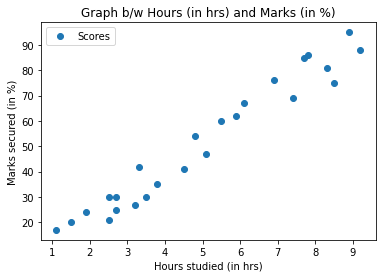

In [4]:
# Plotting the distribution of scores

s_data.plot(x='Hours',y='Scores',style='o')
plt.xlabel('Hours studied (in hrs)')
plt.ylabel('Marks secured (in %)')
plt.title('Graph b/w Hours (in hrs) and Marks (in %)')
plt.show()




**From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**

### **Preparing the data**

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [5]:
x = s_data.iloc[:, :1].values  
y = s_data.iloc[:, 1:].values  

In [6]:
print(x)
print(y)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]
[[21]
 [47]
 [27]
 [75]
 [30]
 [20]
 [88]
 [60]
 [81]
 [25]
 [85]
 [62]
 [41]
 [42]
 [17]
 [95]
 [30]
 [24]
 [67]
 [69]
 [30]
 [54]
 [35]
 [76]
 [86]]


### **Splitting the data set into train/test set**

Now that we have our attributes and labels, the next step is to split this data into training and test sets. Well do this by using Scikit-Learns built-in train_test_split() method:

In [7]:
#Importing from sklearn library
from sklearn.model_selection import train_test_split  


In [8]:
#Splitting data set

#data will be split into test/train data set.
#test size=0.2 , means 20% data is used for testing model and rest 80% for training model.
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2, random_state=0) 

### **Training the Algorithm**
We have split our data into training and testing sets, and now is finally the time to train our algorithm. 

In [9]:
#Importing from sklearn library

from sklearn.linear_model import LinearRegression  

In [10]:
#Initialising
regressor = LinearRegression()  

#Tained model is strored in regressor variable.
regressor.fit(x_train, y_train) 

print("Training complete.")

Training complete.


[[26.79480124]
 [52.56250809]
 [33.73226078]
 [86.25874013]
 [36.70545772]
 [16.88414476]
 [93.19619966]
 [56.52677068]
 [84.27660883]
 [28.77693254]
 [78.33021494]
 [60.49103328]
 [46.6161142 ]
 [34.72332643]
 [12.91988217]
 [90.22300272]
 [26.79480124]
 [20.84840735]
 [62.47316457]
 [75.357018  ]
 [28.77693254]
 [49.58931115]
 [39.67865467]
 [70.40168976]
 [79.32128059]]

[[9.91065648]]
[2.01816004]


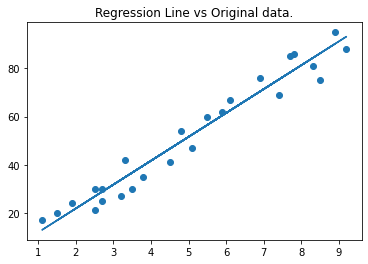

In [11]:
# Plotting the regression line

#Taking every x-value(hours) and calculating the corresponding y-value(marks)
#with the help of calculated values of slope and intercept of the regression line of the trained model
#and storing it in a variable line.
#Line variable now holds the predicted y values of every original x values.

line = regressor.coef_*x+regressor.intercept_
print(line)
print()
print(regressor.coef_)
print(regressor.intercept_)
# Plotting for the test data

#scatter (x,y) would mean simply displaying the original data but in a scttered manner. 
#plt.scatter(x, y) is same as s_data.plot(x='Hours',y='Scores',style='o')
plt.scatter(x, y)

#Ploting (x,line) would mean simply displaying the regression line of the trained model.
plt.plot(x,line)
plt.title("Regression Line vs Original data.")
plt.show()

### **Making Predictions**
Now that we have trained our algorithm, it's time to make some predictions.

In [36]:
 # Testing data - In Hours
print("Test data (Hours) :{}".format(x_test))

# Testing data - Marks %
print()
print("Test data (Marks %) :{}".format(y_test))

# Predicting the scores
y_pred = regressor.predict(x_test) 

print()
print("Predicted data (Marks %) :{}".format(y_pred))



Test data (Hours) :[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]

Test data (Marks %) :[20 27 69 30 62]

Predicted data (Marks %) :[[16.88414476]
 [33.73226078]
 [75.357018  ]
 [26.79480124]
 [60.49103328]]


In [38]:
# Comparing Actual vs Predicted

#reshaping from 2D array to 1D for easy inserting into dataframe
y_test=y_test.flatten()
y_pred=y_pred.flatten()

print(y_test)
print(y_pred)
df = pd.DataFrame({'Actual': y_test,'Predicted': y_pred})  
df 

[20 27 69 30 62]
[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [21]:

#np.array return an nd-array
score_pred=np.array([7])
print(score_pred)

#Since predict method requires a 2D array hence reshaping to (1,1)
score_pred=score_pred.reshape(1,1)
print(score_pred)

#predicting the test set
predict=regressor.predict(score_pred)

print("No of hours={}".format(7))
print("Predicted Score={}".format(predict[0]))

[7]
[[7]]
No of hours=7
Predicted Score=[71.39275541]


### **Evaluating the model**

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean absolute error. There are many such metrics.

In [15]:
#Importing from sklearn library

from sklearn import metrics  

In [16]:
#Finding MAR of the linear regression model.

print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002982
